### 회귀
- loss = MSE(평균제곱오차)
- 맨 마지막 뉴런(출력층 units) 개수 : 1
- 활성화 함수 : linear(항등 함수)



### 이진 분류
- loss = binary_crossentropy
- 맨 마지막 뉴런(출력층 units) : 1
- 활성화 함수 : sigmoid
- metrics = ['accuracy']

### 다중분류
- loss = categorical_crossentropy
- 맨 마지막 뉴런(출력층 units) : 범주 종류 수(클래스 수)
- 활성화 함수 :softmax(총합이 1인 확률 값 반환)

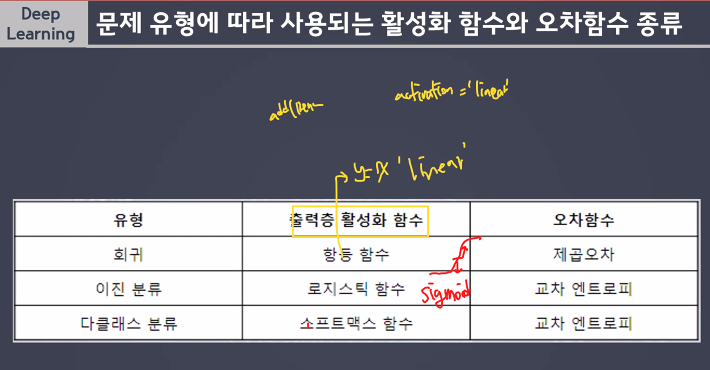

In [53]:
#데이터 abs불러오기
from tensorflow.keras.datasets import fashion_mnist

In [46]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [47]:
#회귀.이진.다중-> 클래스를 봤을때 해야하는건 분류!, 분류중에서 다중분류

In [6]:
len(data)

2

In [9]:
print(len(data[0]))  # 이중리스트 [[X,y],[X,y]]
print(len(data[1]))   # 데이터 안에 두 개의 데이터가 0,1로 인덱싱 되어 있으니까 0번째 거는 train, 1번째 거는 test

2
2


In [14]:
# 훈련, 테스트
train = data[0]
test = data[1]

In [15]:
#문제, 정답 분리
X_train = train[0]
y_train = train[1]

In [16]:
X_test = test[0]
y_test = test[1]

In [17]:
X_train.shape, y_train.shape    # (데이터 개수, 가로,세로 픽셀 수)

((60000, 28, 28), (60000,))

In [43]:
X_test.shape, y_test.shape    # (데이터 개수, 가로,세로 픽셀 수)

((10000, 28, 28), (10000,))

In [42]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 데이터 시각화

In [18]:
import matplotlib.pyplot as plt

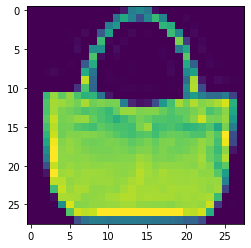

In [19]:
plt.imshow(X_train[100])  

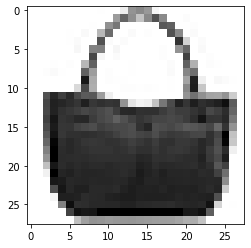

In [48]:
plt.imshow(X_train[100], cmap='gray_r')  

In [21]:
y_train[100]  

8

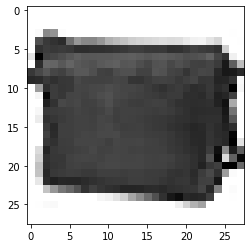

In [49]:
plt.imshow(X_train[12345], cmap='gray_r')

In [23]:
y_train[12345] 

8

In [24]:
import numpy as np #배열데이터를 계산하기 쉽게해 줌

In [25]:
# 라벨 종류
np.unique(y_train) # 고유값을 알려줌

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
# 라벨 빈도수
np.bincount(y_train) #각라벨의 총개수를 알려줌

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [50]:
X_train[0]  # 색을 의밈, 0~255 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

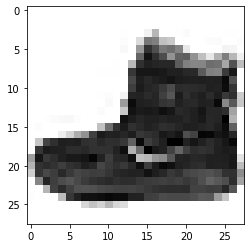

In [52]:
plt.imshow(X_train[0],cmap="gray_r")

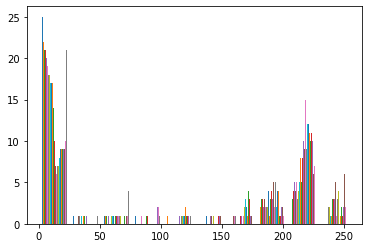

In [27]:
plt.hist(X_train[0])
plt.show()
# 숫자값들의 분포확인가능

###  모델링
1. 모델 구조 설계
2. 모델 학습/평가 결과 시각화
3. 모델 평가

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [30]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [31]:
# 확률 정보로 변환
to_categorical(y_train[:10])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [33]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
# 1. 모델 구조 설계
mnist_model = Sequential()

mnist_model.add(InputLayer(input_shape=(28,28)))
mnist_model.add(Flatten()) # 들어온 데이터를 1차원으로 평평하게 만들어주는 층
mnist_model.add(Dense(units=32, activation='sigmoid'))
mnist_model.add(Dense(units=64, activation='sigmoid'))
mnist_model.add(Dense(units=64, activation='sigmoid'))
mnist_model.add(Dense(units=32, activation='sigmoid'))
mnist_model.add(Dense(units=10, activation='softmax')) #출력층
# 다중분류의 출력층의 units=클래스의 수

In [35]:
# 2. 모델 학습/평가 방법 설정
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics='accuracy')

In [36]:
# 3. 모델 학습 및 학습결과 시각화

In [37]:
mnist_history = mnist_model.fit(X_train, y_train_one_hot, 
                validation_split=0.3, 
                epochs=100)

Epoch 1/100
1313/1313 [==============================] - 1s 762us/step - loss: 1.4725 - accuracy: 0.4196 - val_loss: 1.1091 - val_accuracy: 0.5237
Epoch 2/100
1313/1313 [==============================] - 1s 672us/step - loss: 1.0834 - accuracy: 0.5517 - val_loss: 1.0245 - val_accuracy: 0.5893
Epoch 3/100
1313/1313 [==============================] - 1s 657us/step - loss: 1.0288 - accuracy: 0.5747 - val_loss: 0.9550 - val_accuracy: 0.6414
Epoch 4/100
1313/1313 [==============================] - 1s 681us/step - loss: 0.9748 - accuracy: 0.6085 - val_loss: 0.9964 - val_accuracy: 0.5968
Epoch 5/100
1313/1313 [==============================] - 1s 657us/step - loss: 0.9312 - accuracy: 0.6333 - val_loss: 0.8973 - val_accuracy: 0.6470
Epoch 6/100
1313/1313 [==============================] - 1s 673us/step - loss: 0.9551 - accuracy: 0.6213 - val_loss: 0.8932 - val_accuracy: 0.6487
Epoch 7/100
1313/1313 [==============================] - 1s 678us/step - loss: 0.8779 - accuracy: 0.6635 - val_loss: 0

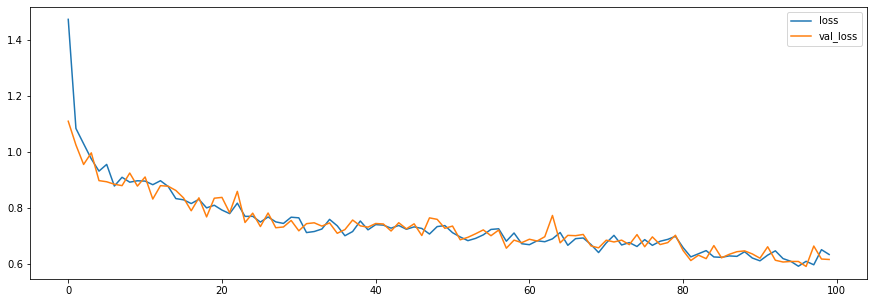

In [38]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['loss'], label='loss')
plt.plot(mnist_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

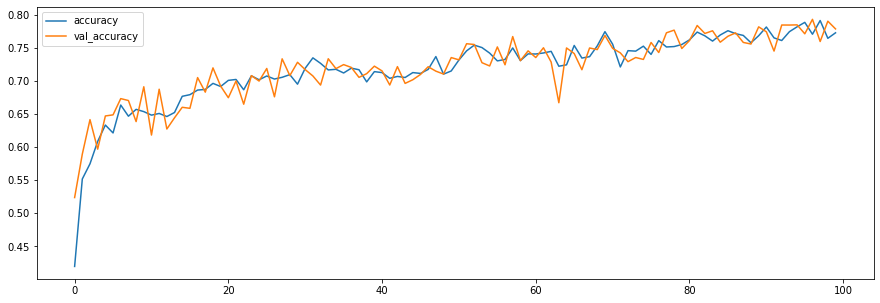

In [39]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['accuracy'], label='accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [40]:
# 4. 모델 평가
mnist_model.evaluate(X_test, y_test_one_hot)
# out:  loss, acc

313/313 [==============================] - 0s 416us/step - loss: 0.6476 - accuracy: 0.7641


[0.647563636302948, 0.7641000151634216]